In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Q1

In [2]:
bag = [25,26,21,22,31,29,33,34,26,30,31,46]

#### A) Create `bag_weights` from bag array of shape (3, 4)

In [3]:
bag_weights = np.array(bag).reshape(3,4)
bag_weights

array([[25, 26, 21, 22],
       [31, 29, 33, 34],
       [26, 30, 31, 46]])

#### B) Use Numpy library to display the mean, variance and median of the given data in `bag_weights`

In [4]:
print("Mean:", np.mean(bag_weights))
print("Variance:", np.var(bag_weights))
print("Median:", np.median(bag_weights))

Mean: 29.5
Variance: 40.25
Median: 29.5


#### C) Write a command to display the count of values greater than the median in `bag_weights`

In [5]:
(bag_weights > np.median(bag_weights)).sum()

6

#### D) Transpose `bag_weights` and then split it in two arrays `bagA` and `bagB` having 2 rows and 3 columns each.

In [6]:
bag_weights = bag_weights.T
bag_weights

array([[25, 31, 26],
       [26, 29, 30],
       [21, 33, 31],
       [22, 34, 46]])

In [7]:
bagA, bagB = bag_weights[:2, :], bag_weights[2:, :]

In [8]:
bagA

array([[25, 31, 26],
       [26, 29, 30]])

In [9]:
bagB

array([[21, 33, 31],
       [22, 34, 46]])

#### E) Sort `bagA` such that it brings the highest value of the row in the first column. Sort `bagB` such that it brings the lowest value of the row in the first column.

In [10]:
bagA = -np.sort(-bagA)
bagA

array([[31, 26, 25],
       [30, 29, 26]])

In [11]:
bagB = np.sort(bagB)
bagB

array([[21, 31, 33],
       [22, 34, 46]])

#### F) Find the union and intersection of values in `bagA` and `bagB`

In [12]:
np.union1d(bagA, bagB)

array([21, 22, 25, 26, 29, 30, 31, 33, 34, 46])

In [13]:
np.intersect1d(bagA, bagB)

array([31])

## Q2

In [14]:
rate = [4.23,3.8,2.98,2.56,3,114,3.8,3.78,2.98,4.8,4.10,3.65]

#### A) Import the appropriate Python libraries to create a one-dimensional ndarray called `growth_rate` from the list `rate`. Create another one-dimensional array named `twos` having the same number of elements as `growth_rate`, all set to 2.

In [15]:
growth_rate = np.array(rate)
growth_rate

array([  4.23,   3.8 ,   2.98,   2.56,   3.  , 114.  ,   3.8 ,   3.78,
         2.98,   4.8 ,   4.1 ,   3.65])

In [16]:
twos = np.full_like(growth_rate, 2)
twos

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

#### B) Use Numpy library to find the index of the maximum and the minimum values in the array `growth_rate`.

In [17]:
np.argmax(growth_rate)

5

In [18]:
np.argmin(growth_rate)

3

#### C) What does a box plot show? Give a command to display a boxplot for `growth_rate`.

A box plot is helpful in visualizing the different quartiles, interquartile range and the outliers present in some data.

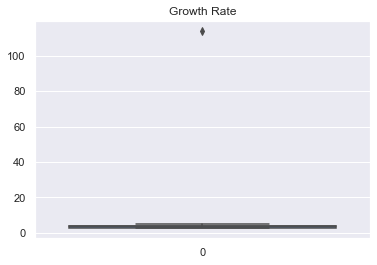

In [21]:
sns.boxplot(data=growth_rate)
plt.title('Growth Rate')
plt.show()

#### D) Concatenate the two arrays `growth_rate` and `twos`, and reshape the resulting array to have four rows and appropriate number of columns, call it `results`

In [22]:
results = np.concatenate((growth_rate, twos))
results = results.reshape(4, results.size // 4)
results

array([[  4.23,   3.8 ,   2.98,   2.56,   3.  , 114.  ],
       [  3.8 ,   3.78,   2.98,   4.8 ,   4.1 ,   3.65],
       [  2.  ,   2.  ,   2.  ,   2.  ,   2.  ,   2.  ],
       [  2.  ,   2.  ,   2.  ,   2.  ,   2.  ,   2.  ]])

#### E) Find the mean, median, mode and std for each column in `results`

In [23]:
print("Mean:", results.mean(axis=0))
print("Median:", np.median(results, axis=0))
print("Std:", results.std(axis=0))

Mean: [ 3.0075  2.895   2.49    2.84    2.775  30.4125]
Median: [2.9   2.89  2.49  2.28  2.5   2.825]
Std: [ 1.01890566  0.89502793  0.49        1.15446958  0.86710726 48.26396657]


#### F) Write a command to store the array `results` to a file called `result.npy` on the disk in the current working directory.

In [24]:
np.save('./results.npy', results)

## Q3

In [25]:
df = pd.read_csv('./Q3.csv', index_col='#')

In [26]:
df

,Movie_title,Director_name,Language,Length,Budget,Gross_collections,User_rating,Critic_rating
#,,,,,,,,
1,AAA,Ram,Urdu,120.0,90,80.0,4,7
2,BBB,Eash,Hindi,NaN,65,70.0,6,6
3,CCC,Anju,Hindi,125.0,100,150.0,9,8
4,DDD,Jay,Hindi,150.0,85,85.0,6,5
5,EEE,Eash,Hindi,90.0,60,NaN,7,5
6,FFF,Suraj,French,100.0,115,120.0,8,6
7,GGG,Anju,French,NaN,80,81.0,5,5
8,HHH,Ram,French,115.0,50,40.0,3,4
9,JJJ,Anju,French,120.0,92,75.0,3,6


#### A) Display the number of rows and columns present in `df`

In [27]:
df.shape

(9, 8)

#### B) Display the names of columns that have NULL values present in them, along with the count of NULL values. Replace the NULL values present in the column with the lowest value in that column

In [28]:
df.isna().sum()[df.isna().sum() > 0]

Length               2
Gross_collections    1
dtype: int64

In [29]:
df = df.apply(lambda x: x.fillna(min(x)), axis=0)

In [30]:
df

,Movie_title,Director_name,Language,Length,Budget,Gross_collections,User_rating,Critic_rating
#,,,,,,,,
1,AAA,Ram,Urdu,120.0,90,80.0,4,7
2,BBB,Eash,Hindi,90.0,65,70.0,6,6
3,CCC,Anju,Hindi,125.0,100,150.0,9,8
4,DDD,Jay,Hindi,150.0,85,85.0,6,5
5,EEE,Eash,Hindi,90.0,60,40.0,7,5
6,FFF,Suraj,French,100.0,115,120.0,8,6
7,GGG,Anju,French,90.0,80,81.0,5,5
8,HHH,Ram,French,115.0,50,40.0,3,4
9,JJJ,Anju,French,120.0,92,75.0,3,6


#### C) Create a new column in df named `Rating`, which contains the mean of `User_rating` and `Critic_rating`. Create another column, `Profit`, which contains the difference of `Gross_collections` and `Budget`.

In [31]:
df['Rating'] = (df['User_rating'] + df['Critic_rating']) / 2

In [32]:
df['Profit'] = df['Gross_collections'] - df['Budget']

In [33]:
df

,Movie_title,Director_name,Language,Length,Budget,Gross_collections,User_rating,Critic_rating,Rating,Profit
#,,,,,,,,,,
1,AAA,Ram,Urdu,120.0,90,80.0,4,7,5.5,-10.0
2,BBB,Eash,Hindi,90.0,65,70.0,6,6,6.0,5.0
3,CCC,Anju,Hindi,125.0,100,150.0,9,8,8.5,50.0
4,DDD,Jay,Hindi,150.0,85,85.0,6,5,5.5,0.0
5,EEE,Eash,Hindi,90.0,60,40.0,7,5,6.0,-20.0
6,FFF,Suraj,French,100.0,115,120.0,8,6,7.0,5.0
7,GGG,Anju,French,90.0,80,81.0,5,5,5.0,1.0
8,HHH,Ram,French,115.0,50,40.0,3,4,3.5,-10.0
9,JJJ,Anju,French,120.0,92,75.0,3,6,4.5,-17.0


#### D) Find the correlation between `Budget` and `Rating`. Based on the correlation values between two variables, what inference(s) can be drawn about the relationship between them?

In [34]:
df['Budget'].corr(df['Rating'])

0.5879443312563414

The correlation is around 0.6, which indicates that there is some positive relationship between these two variables. Movies with higher budget tend to have better ratings.

#### E) Group the movies according to the `Director_name`. Find the most profitable director.


In [35]:
df.groupby(['Director_name'])['Profit'].sum().idxmax()

'Anju'

#### F) What does a contingency table depict? Write commands to display the contingency table between `Director_name` and `Language`.

A contingency table is a type of table in a matrix format that displays the frequency distribution of the variables.

In [36]:
pd.crosstab(df['Director_name'], df['Language'])

Language,French,Hindi,Urdu
Director_name,,,
Anju,2,1,0
Eash,0,2,0
Jay,0,1,0
Ram,1,0,1
Suraj,1,0,0


## Q4

In [37]:
dict1 = { 
    "Chhetri": 80, "Shabbir": 23,
    "Gouramangi": 6, "Subrata": 92,
    "Vijayan": 29, "Gawli": np.nan, 
    "Nabi": 7, "Renedy": 4,
    "Lalpekhlua": 23, "Baichung":41, 
    "Surkumar": 2
}

#### A) Create a Pandas Series for the dictionary `dict1` where the key is name of the footballer and the value is the number of goals scored by him. The Series should have the names of the footballers as its index and values as goals scored.

In [38]:
ser = pd.Series(dict1)
ser

Chhetri       80.0
Shabbir       23.0
Gouramangi     6.0
Subrata       92.0
Vijayan       29.0
Gawli          NaN
Nabi           7.0
Renedy         4.0
Lalpekhlua    23.0
Baichung      41.0
Surkumar       2.0
dtype: float64

#### B) Display the names of Footballers who have scored more than 20 goals.

In [39]:
ser.index[ser > 20]

Index(['Chhetri', 'Shabbir', 'Subrata', 'Vijayan', 'Lalpekhlua', 'Baichung'], dtype='object')

#### C) Due to the good performance of top six footballers, their rankings have increased and the number of goals scored by them need to be increased by 25. Round the resulting value to the nearest integer equal to or more than the computed number of goals. Update the Series to reflect these changes.

In [40]:
ser = pd.concat((ser.sort_values(ascending=False)[:6] + 25, ser.sort_values(ascending=False)[6:]))

In [41]:
ser

Subrata       117.0
Chhetri       105.0
Baichung       66.0
Vijayan        54.0
Shabbir        48.0
Lalpekhlua     48.0
Nabi            7.0
Gouramangi      6.0
Renedy          4.0
Surkumar        2.0
Gawli           NaN
dtype: float64

#### D) Include a 12th man named 'Mondal' in the above Series whose number of goals scored is not known.


In [42]:
ser['Mondal'] = np.nan

In [43]:
ser

Subrata       117.0
Chhetri       105.0
Baichung       66.0
Vijayan        54.0
Shabbir        48.0
Lalpekhlua     48.0
Nabi            7.0
Gouramangi      6.0
Renedy          4.0
Surkumar        2.0
Gawli           NaN
Mondal          NaN
dtype: float64

#### E) Display the list of Footballers whose number of goals scored is NOT NULL.

In [44]:
ser[ser.notnull()]

Subrata       117.0
Chhetri       105.0
Baichung       66.0
Vijayan        54.0
Shabbir        48.0
Lalpekhlua     48.0
Nabi            7.0
Gouramangi      6.0
Renedy          4.0
Surkumar        2.0
dtype: float64

#### F) Due to injury, 'Shabbir' was replaced by 'Sandhu' who number of goals scored is 5. Reflect this change in the Series and display the new Series.

In [45]:
del ser['Shabbir']
ser['Sandhu'] = 5
ser

Subrata       117.0
Chhetri       105.0
Baichung       66.0
Vijayan        54.0
Lalpekhlua     48.0
Nabi            7.0
Gouramangi      6.0
Renedy          4.0
Surkumar        2.0
Gawli           NaN
Mondal          NaN
Sandhu          5.0
dtype: float64

## Q5

#### A) Import the appropriate Python libraries to load the dataset. Create a Pandas DataFrame named `iris` having all the columns in the dataset. 

In [1]:
from sklearn.datasets import load_iris
iris_data = load_iris()

In [3]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
iris = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
iris['species'] = iris_data.target
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
iris['species'] = iris_data.target_names[iris['species']]
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### B) Use an appropriate command to display a summary of the vital statistics of all numerical and categorical attributes in `iris`.


In [10]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### C) What is the role of pre-processing in data analysis? Discuss how will you choose between (a) deleting the rows containing missing values or (b) replacing the missing values in a column with the mean or (c) replacing them with the mode of the column.

Real world data is not as pretty and easy to work with as one might expect. Preprocessing of data is absolutely necessary to not only get a fruitful conclusion from the analysis but sometimes just to make the analysis possible. The real world data suffers from things like missing values and outliers which have a large impact on the analysis. It also needs to be converted into a proper form so that the computer can understand it.

a) This option is suitable when the number of rows with missing values is relatively small when compared to total rows.

b) This option is suitable when the data with missing values is normally distributed.

c) This option is suitable when the data with missing values represents some categories. Null values are simply replaced by the most common category.

#### D) Give a Pandas command to convert the categorical attribute,` species` into dummy variables. Display all the columns of the DataFrame including the dummy variables. Give a command to drop the column `species` from the DataFrame.

In [51]:
iris.drop(['species'], axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### E) Draw a scatterplot between the columns sepal length and petal length for the species setosa in iris. 

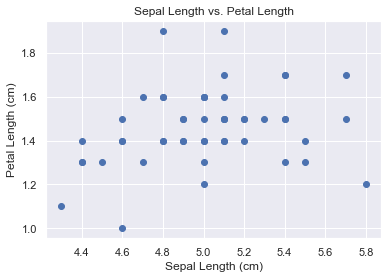

In [11]:
setosa = iris.query('species == "setosa"')

plt.scatter(setosa['sepal length (cm)'], setosa['petal length (cm)'])
plt.title('Sepal Length vs. Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

#### F) Create 5 equal length bins for each of the two columns sepal length and sepal width. Draw two histograms, one each for the values of sepal length and sepal width in these bins in a single figure. Save this image on the disk.

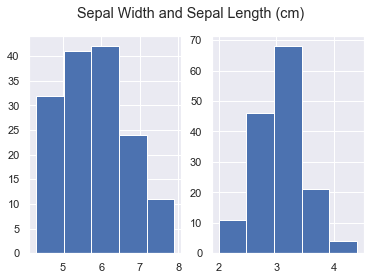

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2)

seplen_bins = ax1.hist(iris['sepal length (cm)'], bins=5)
sepwid_bins = ax2.hist(iris['sepal width (cm)'], bins=5)

fig.suptitle('Sepal Width and Sepal Length (cm)')
plt.show()

In [54]:
print(seplen_bins)
print(sepwid_bins)

(array([32., 41., 42., 24., 11.]), array([4.3 , 5.02, 5.74, 6.46, 7.18, 7.9 ]), <BarContainer object of 5 artists>)
(array([11., 46., 68., 21.,  4.]), array([2.  , 2.48, 2.96, 3.44, 3.92, 4.4 ]), <BarContainer object of 5 artists>)


In [55]:
plt.savefig('graph.jpg')

<Figure size 432x288 with 0 Axes>

## Q6

// Stored the dataset as a comma separated values (.csv) file

#### A) Import the dataset accordingly to `rubies`

In [56]:
rubies = pd.read_csv('./Q6.csv', index_col = 'pcno')
rubies

,carat,cut,color,clarity,depth,table,price
pcno,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55,326.0
2,0.21,Premium,E,SI1,59.8,61,326.0
3,0.23,Good,E,VS1,56.9,65,327.0
4,0.29,Premium,I,VS2,62.4,58,NaN
5,0.31,Good,J,SI2,63.3,58,335.0
6,0.24,Very Good,J,VVS2,NaN,57,336.0
7,0.24,Very Good,I,VVS1,62.3,57,336.0
8,0.26,Very Good,H,SI1,61.9,55,337.0
9,0.22,Fair,E,VS2,65.1,61,NaN


#### B) Draw box plots for all numerical columns of the dataset in the same chart. Display the median of all numerical attributes in rubies for each type of `cut`.

In [57]:
# Dealing with NaNs
rubies.fillna(method='ffill', inplace=True)
rubies

,carat,cut,color,clarity,depth,table,price
pcno,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55,326.0
2,0.21,Premium,E,SI1,59.8,61,326.0
3,0.23,Good,E,VS1,56.9,65,327.0
4,0.29,Premium,I,VS2,62.4,58,327.0
5,0.31,Good,J,SI2,63.3,58,335.0
6,0.24,Very Good,J,VVS2,63.3,57,336.0
7,0.24,Very Good,I,VVS1,62.3,57,336.0
8,0.26,Very Good,H,SI1,61.9,55,337.0
9,0.22,Fair,E,VS2,65.1,61,337.0


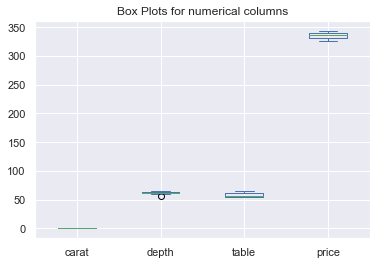

In [58]:
rubies.plot(kind = 'box')
plt.title('Box Plots for numerical columns')
plt.show()

In [59]:
rubies.groupby(['cut']).median()

,carat,depth,table,price
cut,,,,
Fair,0.22,65.1,61.0,337.0
Good,0.30,63.3,58.0,335.0
Ideal,0.23,62.5,55.5,340.0
Premium,0.22,60.4,61.0,327.0
Very Good,0.24,62.1,57.0,336.5


#### C) Display the per carat average price of all rubies grouped by the two attributes `clarity` and `color`.

In [60]:
rubies['price_per_carat'] = rubies['price'] / rubies['carat']
rubies

,carat,cut,color,clarity,depth,table,price,price_per_carat
pcno,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55,326.0,1417.391304
2,0.21,Premium,E,SI1,59.8,61,326.0,1552.380952
3,0.23,Good,E,VS1,56.9,65,327.0,1421.739130
4,0.29,Premium,I,VS2,62.4,58,327.0,1127.586207
5,0.31,Good,J,SI2,63.3,58,335.0,1080.645161
6,0.24,Very Good,J,VVS2,63.3,57,336.0,1400.000000
7,0.24,Very Good,I,VVS1,62.3,57,336.0,1400.000000
8,0.26,Very Good,H,SI1,61.9,55,337.0,1296.153846
9,0.22,Fair,E,VS2,65.1,61,337.0,1531.818182


In [61]:
rubies.groupby(['clarity', 'color'])['price_per_carat'].mean()

clarity  color
SI1      E        1552.380952
         F        1554.545455
         H        1296.153846
         J        1130.000000
SI2      E        1417.391304
         J        1095.161290
VS1      E        1421.739130
         H        1469.565217
         J        1478.260870
VS2      E        1531.818182
         I        1127.586207
VVS1     I        1400.000000
VVS2     J        1400.000000
Name: price_per_carat, dtype: float64

#### D) Normalize all quantitative features in range of [0,1]

In [62]:
rubies.apply(lambda x: (x - x.min())/(x.max() - x.min()) if x.dtype in ['float64', 'int64'] else x)

,carat,cut,color,clarity,depth,table,price,price_per_carat
pcno,,,,,,,,
1,0.2,Ideal,E,SI2,0.560976,0.090909,0.000000,0.710584
2,0.0,Premium,E,SI1,0.353659,0.636364,0.000000,0.995433
3,0.2,Good,E,VS1,0.000000,1.000000,0.055556,0.719759
4,0.8,Premium,I,VS2,0.670732,0.363636,0.055556,0.099053
5,1.0,Good,J,SI2,0.780488,0.363636,0.500000,0.000000
6,0.3,Very Good,J,VVS2,0.780488,0.272727,0.555556,0.673886
7,0.3,Very Good,I,VVS1,0.658537,0.272727,0.555556,0.673886
8,0.5,Very Good,H,SI1,0.609756,0.090909,0.611111,0.454755
9,0.1,Fair,E,VS2,1.000000,0.636364,0.611111,0.952042


#### E) Draw word cloud for attribute `cut`.

In [63]:
rubies['cut'].value_counts()

Ideal        4
Very Good    4
Premium      3
Good         3
Fair         1
Name: cut, dtype: int64